In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical estimation and error bars

- 데이터 시각화에는 여러 데이터 요소를 평균 또는 중앙값과 같은 요약 통계로 축소하는 집계 또는 추정 단계가 포함되는 경우가 있습니다. 
- 요약 통계를 표시할 때는 일반적으로 오차 막대를 추가하여 요약이 기초 데이터 요소를 얼마나 잘 나타내는지에 대한 시각적 단서를 제공하는 것이 적절합니다.

- 전체 데이터 집합이 주어지면 여러 가지 seaborn 함수가 요약 통계와 오차 막대를 자동으로 계산합니다. 
- 이 장에서는 오차 막대에 표시되는 내용을 제어하는 방법과 seaborn이 제공하는 각 옵션을 선택하는 이유에 대해 설명합니다.

- 중심 경향 추정치 주변의 오차 막대는 추정치에 대한 불확실성의 범위 또는 추정치 주변의 기초 데이터의 확산이라는 두 가지 일반적인 사항 중 하나를 나타낼 수 있습니다. 이러한 측정값은 서로 관련이 있습니다. 
- 동일한 표본 크기가 주어지면 데이터의 확산이 더 넓을 때 추정치의 불확실성이 더 커집니다. 
- 그러나 표본 크기가 커지면 불확실성은 감소하는 반면, 확산은 그렇지 않습니다.


- 시본에서는 각 종류의 오차 막대를 구성하는 데 두 가지 접근 방식이 있습니다. 
- 한 가지 접근 방식은 분포의 모양에 대한 가정에 의존하는 공식을 사용하는 파라메트릭 방식입니다. 
- 다른 접근 방식은 사용자가 제공한 데이터만 사용하는 비모수적 접근 방식입니다.


- 플롯의 일부로 추정을 수행하는 각 함수에 대해 존재하는 오차 막대 매개 변수를 사용하여 선택할 수 있습니다. 
- 이 매개변수에는 사용할 방법의 이름과 선택 사항으로 간격의 크기를 제어하는 매개변수를 사용할 수 있습니다. 
- 선택 항목은 표시되는 내용과 구성 방법에 따라 2D 분류체계로 정의할 수 있습니다:

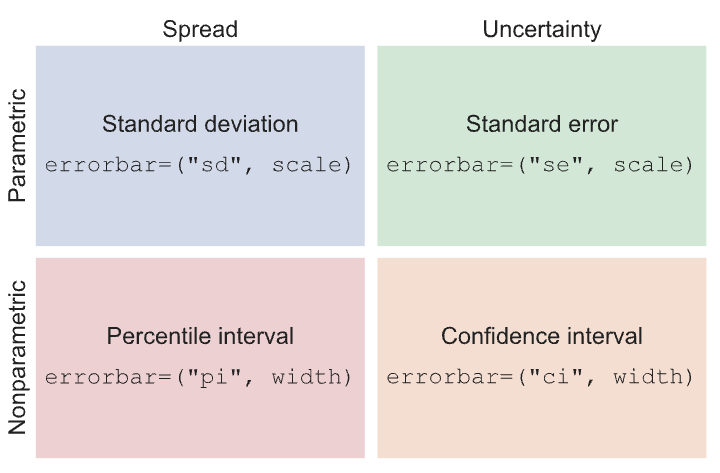

- 크기 매개변수는 파라메트릭 접근 방식과 비파라메트릭 접근 방식에 따라 다르게 정의된다는 것을 알 수 있습니다. 
- 파라메트릭 오차 막대의 경우 오차를 정의하는 통계(표준 오차 또는 표준 편차)를 곱한 스칼라 계수입니다. 
- 비모수적 오차 막대의 경우 백분위수 너비입니다. 
- 이에 대해서는 아래에서 각 특정 접근 방식에 대해 자세히 설명합니다.

- 서로 다른 매개변수화를 비교하기 위해 다음 헬퍼 함수를 사용하겠습니다:

In [3]:
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])


## Measures of Data Spread

- 데이터 분포를 나타내는 오차 막대는 `boxplot()`은 5개 이상의 숫자를 사용하고 `violinplot()`은 복잡한 알고리즘을 사용하는데, 세 개의 숫자를 사용하여 분포를 간결하게 표시합니다.

 ### Standard deviation error bars

- 표준 편차는 익숙한 통계이므로 표준 편차 오차 막대가 가장 간단하게 설명할 수 있습니다. 
- 표준편차는 각 데이터 포인트에서 표본 평균까지의 평균 거리입니다. 
- 기본적으로 `errorbar="sd"`는 추정치 주위에 +/- 1σ의 오차 막대를 그리지만 스케일링 크기 매개변수를 전달하여 범위를 늘릴 수 있습니다. 
- 정규 분포 데이터라고 가정하면 데이터의 ~68%는 1표준편차 내에, ~95%는 2표준편차 내에, ~99.7%는 3표준편차 내에 놓이게 됩니다:

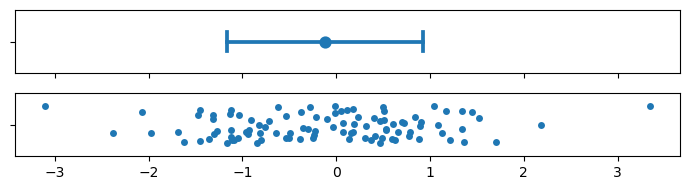

In [4]:
plot_errorbars("sd")

- 표준 편차 오차 막대는 항상 추정치를 중심으로 대칭을 이룹니다. 이는 데이터가 왜곡된 경우, 특히 자연적인 한계가 있는 경우(예: 데이터가 양수만 가능한 수량을 나타내는 경우) 문제가 될 수 있습니다. 
- 경우에 따라 표준편차 오차 막대가 "불가능한" 값까지 확장될 수 있습니다. 
- 비모수적 접근 방식은 비대칭적 확산을 설명할 수 있고 데이터 범위를 벗어나지 않기 때문에 이러한 문제가 없습니다.

### Percentile interval error bars

- 백분위수 구간은 데이터의 일부가 속하는 범위도 나타내지만, 샘플에서 직접 백분위수를 계산하여 표시합니다. 기본적으로 `errorbar="pi"`는 2.5 백분위수에서 97.5 백분위수까지 95%의 구간을 표시합니다. 
- 예를 들어 사 분위수 간 범위를 표시하려면 크기 매개 변수를 전달하여 다른 범위를 선택할 수 있습니다:

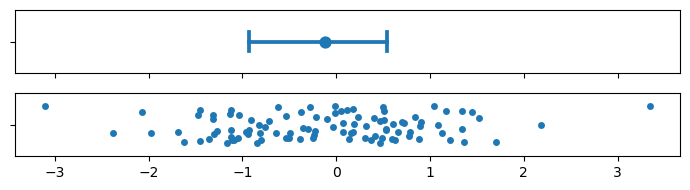

In [5]:
plot_errorbars(("pi", 50))

- 표준 편차 오차 막대는 항상 추정치를 중심으로 대칭을 이룹니다. 
- 이는 데이터가 왜곡된 경우, 특히 자연적인 한계가 있는 경우(예: 데이터가 양수만 가능한 수량을 나타내는 경우) 문제가 될 수 있습니다. 경우에 따라 표준편차 오차 막대가 "불가능한" 값까지 확장될 수 있습니다. 
- 비모수적 접근 방식은 비대칭적 확산을 설명할 수 있고 데이터 범위를 벗어나지 않기 때문에 이러한 문제가 없습니다.

##  Measures of estimate uncertainty

- 데이터가 더 큰 모집단의 무작위 표본인 경우 평균(또는 기타 추정치)은 실제 모집단 평균의 불완전한 측정값이 됩니다. 
- 추정치의 불확실성을 나타내는 오차 막대는 실제 매개변수에 대해 가능한 값의 범위를 나타내려고 합니다.

### Standard error bars 
표준 오차 통계는 표준 편차와 관련이 있으며, 실제로는 표준 편차를 표본 크기의 제곱근으로 나눈 값일 뿐입니다. `errorbar = "se"`인 기본값은 평균에서 +/-1 표준 오차 간격을 그립니다:

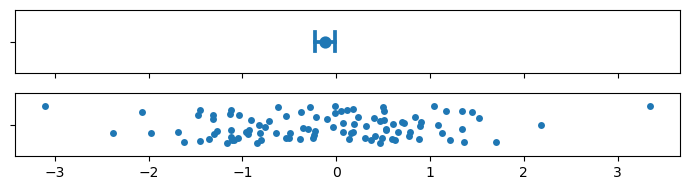

In [6]:
plot_errorbars("se")

### Confidence interval error bars 
- 불확실성을 표현하는 비모수적 접근 방식은 부트스트래핑을 사용합니다. 
- 부트스트래핑은 데이터 집합을 무작위로 여러 번 교체하여 다시 샘플링하고 각 재샘플링에서 추정치를 다시 계산하는 절차입니다. 
- 이 절차는 다른 샘플이 있었다면 추정치에 대해 얻을 수 있었던 값의 분포와 근사한 통계 분포를 생성합니다.

- 신뢰 구간은 부트스트랩 분포의 백분위수 간격을 취하여 구성됩니다. 기본적으로 `errorbar="ci"`는 95% 신뢰 구간을 그립니다:

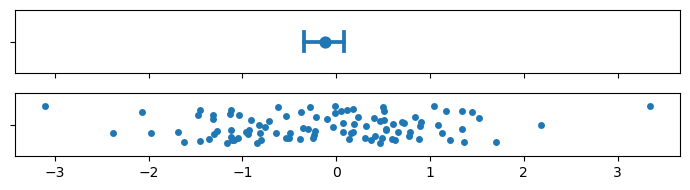

In [7]:
plot_errorbars("ci")

- 통계의 신뢰 구간은 모수적 또는 비모수적일 수 있기 때문에 seaborn의 용어는 다소 구체적입니다. 
- 파라메트릭 신뢰 구간을 도출하려면 위에서 언급한 것과 유사한 공식을 사용하여 표준 오차의 크기를 조정합니다. 
- 예를 들어, 평균 +/- 2개의 표준 오차를 취하여 대략 95% 신뢰 구간을 구성할 수 있습니다:

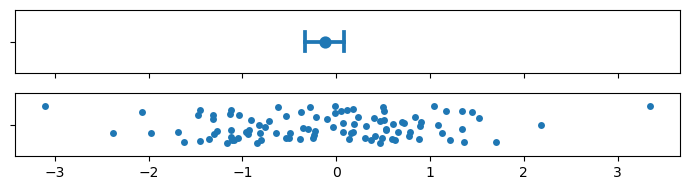

In [8]:
plot_errorbars(('se',2))

- 비모수 부트스트랩은 표준 오차 구간이 할 수 없는 방식으로 왜곡되고 경계가 있는 데이터에 자연스럽게 적응할 수 있다는 점에서 백분위수 구간과 유사한 장점이 있습니다. 또한 더 일반적입니다. 
- 표준 오차 공식은 평균에 한정되어 있지만, 오차 막대는 모든 추정자에 대해 부트스트랩을 사용하여 계산할 수 있습니다:

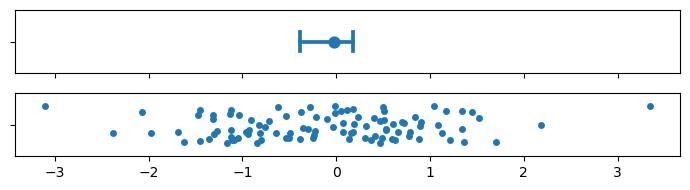

In [9]:
plot_errorbars("ci", estimator='median')

- 부트스트랩에는 무작위성이 포함되며 오차 막대는 오차 막대를 생성하는 코드를 실행할 때마다 조금씩 다르게 나타납니다. 
- 몇 가지 매개변수가 이를 제어합니다. 하나는 반복 횟수(`n_boot`)를 설정합니다. 반복 횟수가 많을수록 결과 간격이 더 안정적입니다. 
- 다른 하나는 난수 생성기의 시드(`seed`)를 설정하여 동일한 결과를 보장합니다:

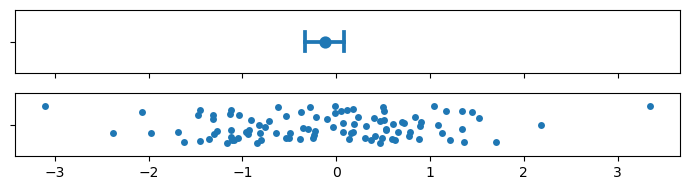

In [10]:
plot_errorbars("ci", n_boot=5000, seed=10)

- 반복적인 프로세스로 인해 부트스트랩 간격은 특히 대규모 데이터 세트의 경우 계산 비용이 많이 들 수 있습니다. 
- 그러나 샘플 크기에 따라 불확실성이 감소하기 때문에 이 경우 데이터 확산을 나타내는 오차 막대를 사용하는 것이 더 많은 정보를 제공할 수 있습니다.


### Custom error bars 
- 만약 레시피가 충분하지 않다면 `errorbar` 파라미터에 generic 함수를 넣을 수 있습니다. 
- 이 함수는 하나의 벡터로 최소값과 최대값을 나타내는 한 쌍을 만들어 냅니다. 

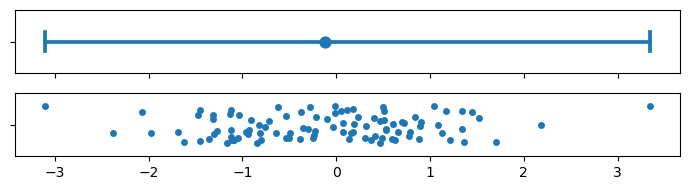

In [11]:
plot_errorbars((lambda x : (x.min(), x.max())))

- (실제로는 위에 표시된 사용자 정의 함수 대신 errorbar=("pi", 100)을 사용하여 데이터의 전체 범위를 표시할 수 있습니다.)

- 현재 seaborn 함수는 외부에서 계산된 값에서 오차 막대를 그릴 수 없지만, matplotlib 함수를 사용하여 이러한 오차 막대를 seaborn 플롯에 추가할 수 있습니다.

## Error bars on regression fits

- 앞서 설명한 내용은 집계 데이터의 매개변수 추정치 주위에 표시되는 오차 막대에 중점을 두었습니다. 
- 관계를 시각화하기 위해 회귀 모델을 추정할 때에도 오차 막대가 발생합니다. 여기서 오차 막대는 회귀선 주위의 '밴드'로 표시됩니다:

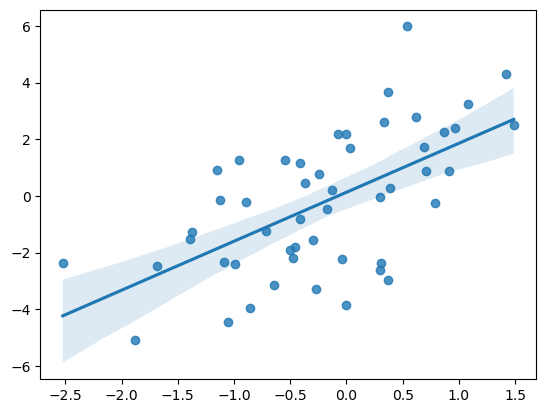

In [12]:
x = np.random.normal(0, 1, 50)
y = x * 2 + np.random.normal(0, 2, size=x.size)
sns.regplot(x=x, y=y);

- 현재 회귀 추정치의 오차 막대는 유연성이 떨어지며, `ci=`를 통해 설정된 크기의 신뢰 구간만 표시합니다. 이는 향후 변경될 수 있습니다.

## Are error bars enough? 

- 요약 통계와 오차 막대만 표시하는 플롯을 사용하는 것이 최선인지 항상 자문해 보아야 합니다. 대부분의 경우 그렇지 않습니다.

- 요약에 대한 질문(예: 평균값이 그룹 간에 차이가 있는지 또는 시간에 따라 증가하는지 여부)에 관심이 있는 경우, 집계를 사용하면 플롯의 복잡성이 줄어들고 이러한 추론이 더 쉬워집니다. 
- 그러나 이 과정에서 분포의 모양이나 이상값의 존재 여부와 같은 기본 데이터 요소에 대한 중요한 정보가 가려집니다.

- 자체 데이터를 분석할 때는 요약 통계에 만족하지 마세요. 항상 기본 분포도 살펴보세요. 
- 때로는 두 가지 관점을 같은 그림으로 결합하는 것이 도움이 될 수 있습니다. 특히 범주형 튜토리얼에서 설명한 함수를 비롯한 많은 함수가 이 작업에 도움이 될 수 있습니다.